In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
train_df = pd.read_csv(r"dataset\fashion-mnist_train.csv")
test_df = pd.read_csv(r"dataset\fashion-mnist_test.csv")

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df,dtype='float32')

x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [8]:
x_train,x_validate,y_train,y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [13]:
image = x_train[100,:].reshape((28,28))

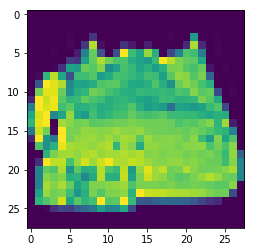

In [14]:
plt.imshow(image)
plt.show()

# CNN

In [11]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows,im_cols,1)

x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test = x_test.reshape(x_test.shape[0],*im_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*im_shape)

print('x_train shape : {}'.format(x_train.shape))
print('x_test shape : {}'.format(x_test.shape))
print('x_validate shape : {}'.format(x_validate.shape))

x_train shape : (48000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)
x_validate shape : (12000, 28, 28, 1)


In [14]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Conv2D(256, kernel_size=3, activation='relu', name='Conv2D-4'),
    Dropout(0.6, name='Dropout-4'),
    Flatten(name='flatten'),
    Dense(256, activation='relu', name='Dense'),
    Dropout(0.6, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
])

In [15]:
cnn_model.compile(
    loss ='sparse_categorical_crossentropy',
    optimizer = Adam(lr=0.001),
    metrics=['accuracy']
)

In [16]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(x_validate,y_validate),
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 155s 3ms/step - loss: 0.9741 - acc: 0.6375 - val_loss: 0.5343 - val_acc: 0.7862
Epoch 2/50
48000/48000 [==============================] - 157s 3ms/step - loss: 0.5655 - acc: 0.7857 - val_loss: 0.4207 - val_acc: 0.8384
Epoch 3/50
48000/48000 [==============================] - 164s 3ms/step - loss: 0.4848 - acc: 0.8218 - val_loss: 0.3629 - val_acc: 0.8649
Epoch 4/50
48000/48000 [==============================] - 162s 3ms/step - loss: 0.4326 - acc: 0.8435 - val_loss: 0.3301 - val_acc: 0.8774
Epoch 5/50
48000/48000 [==============================] - 163s 3ms/step - loss: 0.3989 - acc: 0.8572 - val_loss: 0.3122 - val_acc: 0.8845
Epoch 6/50
48000/48000 [==============================] - 152s 3ms/step - loss: 0.3728 - acc: 0.8659 - val_loss: 0.2930 - val_acc: 0.8917
Epoch 7/50
48000/48000 [==============================] - 147s 3ms/step - loss: 0.3482 - acc: 0.8735 - val_loss: 0.2815 - 

In [17]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)

print('test loss : {:4f}'.format(score[0]))
print('test score : {:4f}'.format(score[1]))

test loss : 0.181013
test score : 0.938600


In [22]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Conv2D(256, kernel_size=3, activation='relu', name='Conv2D-4'),
    Dropout(0.4, name='Dropout-4'),
    Conv2D(512, kernel_size=3, activation='relu', name='Conv2D-5'),
    Dropout(0.5, name='Dropout-5'),
    Flatten(name='flatten'),
    Dense(512, activation='relu', name='Dense'),
    Dropout(0.5, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
])

In [23]:
cnn_model.compile(
    loss ='sparse_categorical_crossentropy',
    optimizer = Adam(lr=0.001),
    metrics=['accuracy']
)

In [24]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(x_validate,y_validate),
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 336s 7ms/step - loss: 1.3839 - acc: 0.4928 - val_loss: 0.6842 - val_acc: 0.7364
Epoch 2/50
48000/48000 [==============================] - 337s 7ms/step - loss: 0.7512 - acc: 0.7144 - val_loss: 0.5701 - val_acc: 0.7783
Epoch 3/50
48000/48000 [==============================] - 351s 7ms/step - loss: 0.6401 - acc: 0.7570 - val_loss: 0.5013 - val_acc: 0.8003
Epoch 4/50
48000/48000 [==============================] - 337s 7ms/step - loss: 0.5722 - acc: 0.7856 - val_loss: 0.4600 - val_acc: 0.8255
Epoch 5/50
48000/48000 [==============================] - 335s 7ms/step - loss: 0.5203 - acc: 0.8082 - val_loss: 0.4001 - val_acc: 0.8527
Epoch 6/50
48000/48000 [==============================] - 334s 7ms/step - loss: 0.4740 - acc: 0.8270 - val_loss: 0.3684 - val_acc: 0.8642
Epoch 7/50
48000/48000 [==============================] - 337s 7ms/step - loss: 0.4440 - acc: 0.8391 - val_loss: 0.3501 - 